In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

x = x[y != 0, :2]
y = y[y != 0]

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(len(x))
print(len(x_train))

100
80


In [4]:
kernel = 'linear'

model = svm.SVC(kernel=kernel, gamma=1.0)
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1.0,
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [6]:
model._gamma

1.0

In [7]:
x_min = x[:, 0].min()
x_max = x[:, 0].max()
y_min = x[:, 1].min()
y_max = x[:, 1].max()

In [8]:
w = model.coef_[0]
print('coef_', w)
a = -w[0] / w[1]
xx = np.linspace(x_min, x_max)
yy = a * xx - (model.intercept_[0]) / w[1]
print('intercept_', model.intercept_)
print(xx)
print(yy)

coef_ [1.50485895 0.86054174]
intercept_ [-11.92248741]
[4.9        4.96122449 5.02244898 5.08367347 5.14489796 5.20612245
 5.26734694 5.32857143 5.38979592 5.45102041 5.5122449  5.57346939
 5.63469388 5.69591837 5.75714286 5.81836735 5.87959184 5.94081633
 6.00204082 6.06326531 6.1244898  6.18571429 6.24693878 6.30816327
 6.36938776 6.43061224 6.49183673 6.55306122 6.61428571 6.6755102
 6.73673469 6.79795918 6.85918367 6.92040816 6.98163265 7.04285714
 7.10408163 7.16530612 7.22653061 7.2877551  7.34897959 7.41020408
 7.47142857 7.53265306 7.59387755 7.65510204 7.71632653 7.77755102
 7.83877551 7.9       ]
[5.28583137 5.178766   5.07170063 4.96463525 4.85756988 4.75050451
 4.64343914 4.53637377 4.4293084  4.32224302 4.21517765 4.10811228
 4.00104691 3.89398154 3.78691616 3.67985079 3.57278542 3.46572005
 3.35865468 3.25158931 3.14452393 3.03745856 2.93039319 2.82332782
 2.71626245 2.60919707 2.5021317  2.39506633 2.28800096 2.18093559
 2.07387022 1.96680484 1.85973947 1.7526741  1.645

In [9]:
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

In [10]:
model.support_vectors_

array([[5.8, 2.7],
       [5.6, 3. ],
       [5.6, 3. ],
       [6.7, 3. ],
       [7. , 3.2],
       [6. , 2.2],
       [6.1, 2.8],
       [6.2, 2.9],
       [6.1, 2.8],
       [5.9, 3.2],
       [5.7, 2.8],
       [6.7, 3.1],
       [5.6, 2.9],
       [6.2, 2.2],
       [6.1, 3. ],
       [6.3, 2.5],
       [6.8, 2.8],
       [6. , 2.7],
       [6.5, 2.8],
       [5.7, 2.9],
       [5.9, 3. ],
       [6.3, 3.3],
       [6.1, 2.9],
       [6.6, 2.9],
       [5.7, 2.8],
       [6.9, 3.1],
       [6.6, 3. ],
       [6.3, 2.3],
       [6.4, 3.2],
       [5.6, 2.8],
       [6.4, 3.1],
       [6.7, 3.1],
       [6.5, 3. ],
       [6.3, 2.7],
       [6.2, 3.4],
       [5.7, 2.5],
       [6.3, 2.8],
       [5.8, 2.7],
       [6.4, 2.8],
       [6.5, 3.2],
       [6.3, 2.5],
       [6.5, 3. ],
       [5.9, 3. ],
       [6.3, 3.4],
       [6. , 2.2],
       [6.7, 3.3],
       [6.1, 2.6],
       [6.4, 3.2],
       [6.7, 3. ],
       [6.7, 2.5],
       [6.8, 3. ],
       [6.5, 3. ],
       [6.3,

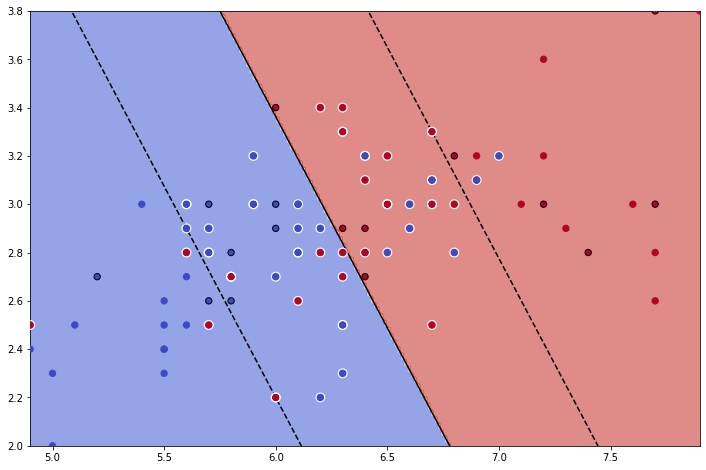

In [34]:
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

pred_test = model.predict(x_test)

figsize = np.array(plt.rcParams["figure.figsize"]) * 2
plt.figure(figsize=figsize.tolist())

plt.contourf(XX, YY, Z, cmap='coolwarm', alpha=0.6)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80, facecolors='none', zorder=20, edgecolors='white')
plt.scatter(x_test[:, 0], x_test[:, 1], c=pred_test, zorder=10, cmap='coolwarm', edgecolor='k', s=40)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, zorder=10, cmap='coolwarm', edgecolor='face', s=40)

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [0]:
model.dual_coef_

In [23]:
200j

200j

In [25]:
[x_min:x_max:200j]

SyntaxError: invalid syntax (<ipython-input-25-bdb6b3d49427>, line 1)